In [1]:
from linares_plot import *
import statsmodels.formula.api as smf
import os
import math

In [2]:
##convert the coordinates to the actual response
pos0 = [0.4, 0]
pos45=[0.25,0.25]
pos90=[0,0.4]
pos135=[-0.25,0.25]
pos180=[-0.4,0]
pos225=[-0.25,-0.25]
pos270=[0,-0.4]
pos315=[0.25,-0.25]

coordinates_=[pos0, pos45, pos90, pos135, pos180, pos225, pos270, pos315]
coordinates_angles=[0.,45.,90.,135.,180.,225.,270.,315.]

def euclidean_distance(p1, p2):
    #p1=np.array([0,0.5])
    #p2=np.array([-0.1,0.4])
    return np.sqrt(np.sum(np.square(p1 - p2)))

In [3]:
filenames = os.listdir('data_to_convert') 
filenames

['Adriana G_task_2021-04-10_12h23.38.261.csv',
 'adrián _task_2021-04-09_21h13.29.214.csv',
 'Ana Nizet_task_2021-04-10_12h31.09.323.csv',
 'Andrea B_task_2021-04-10_12h23.37.811.csv',
 'Anna J_task_2021-04-10_12h23.21.613.csv',
 'Anna S_task_2021-04-10_12h24.53.028.csv',
 'BruG_task_2021-04-10_12h24.00.095.csv',
 'Carla J._task_2021-04-10_11h24.17.595.csv',
 'Carme H_task_2021-04-10_12h23.55.027.csv',
 'Clodagh O_task_2021-04-10_12h23.42.438.csv',
 'Elia B_task_2021-04-10_12h24.01.443.csv',
 'Emma S_task_2021-04-10_12h23.54.820.csv',
 'Ester_task_2021-04-09_22h23.06.716.csv',
 'Eva T_task_2021-04-10_12h24.10.367.csv',
 'Gala C_task_2021-04-10_12h24.00.778.csv',
 'Gisela C_task_2021-04-10_12h23.29.417.csv',
 'Jordi_task_2021-04-09_22h16.58.709.csv',
 'Laia B_task_2021-04-10_12h23.30.264.csv',
 'LauraB_task_2021-04-10_12h23.36.697.csv',
 'maria c_task_2021-04-10_12h23.49.141.csv',
 'Maria S_task_2021-04-10_12h24.16.104.csv',
 'Mariona F_task_2021-04-10_12h24.11.919.csv',
 'martac_task_2

In [4]:
frames=[]

for idx, file in enumerate(filenames):
    df = pd.read_csv(os.getcwd() + '\\data_to_convert\\' + file)
    ###
    df['mouse.x'] = df['mouse.x'].replace(df['mouse.x'].iloc[-1], 0)
    df['mouse.y'] = df['mouse.y'].replace(df['mouse.y'].iloc[-1], 0)
    df['mouse_2.x'] = df['mouse_2.x'].replace(df['mouse_2.x'].iloc[0], 0)
    df['mouse_2.y'] = df['mouse_2.y'].replace(df['mouse_2.y'].iloc[0], 0)
    df['mouse_3.x'] = df['mouse_3.x'].replace(df['mouse_3.x'].iloc[0], 0)
    df['mouse_3.y'] = df['mouse_3.y'].replace(df['mouse_3.y'].iloc[0], 0)
    df['x_resp'] = df['mouse.x'] + df['mouse_2.x']  + df['mouse_3.x']
    df['y_resp'] = df['mouse.y'] + df['mouse_2.y']  + df['mouse_3.y']
    ###
    df_ = df[['target_angle', 'load', 'delay', 'x_resp', 'y_resp']].iloc[0:-1, :]
    ###
    responses=[]
    modules=[]
    for i in range(len(df_)):
        coordinates_resp = np.array([df_.iloc[i].x_resp, df_.iloc[i].y_resp])
        eucl_dists = [euclidean_distance(coordinates_resp, coordinates_[i]) for i in range(len(coordinates_))]
        responded_angle = coordinates_angles[np.where(eucl_dists==min(eucl_dists))[0][0]]
        responses.append(responded_angle)
        #####
        Ptraget = coordinates_[np.where(df_.iloc[i].target_angle==coordinates_angles)[0][0]]
        mod = euclidean_distance(coordinates_resp, Ptraget)
        modules.append(mod)
    #
    df_['responded'] = responses
    df_['module'] = modules
    ###
    df_['Correct'] = df_['target_angle'] == df_['responded']
    df_['Correct'] = df_['Correct'] *1
    ### load, delay, x_resp, y_resp, x_target, y_target
    x_target=[]
    y_target=[]
    for i in range(len(df_)):
        pos_cord = np.where(df_.iloc[i].target_angle==coordinates_angles)[0][0]
        x_target.append(coordinates_[pos_cord][0])
        y_target.append(coordinates_[pos_cord][1])
    #
    df_['x_target'] = x_target
    df_['y_target'] = y_target
    ###
    df_output=df_[['load', 'delay', 'Correct', 'responded', 'target_angle', 'module' ]]
    df_output['subj']=idx
    frames.append(df_output)
                

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\ipykernel_launcher.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [5]:
df_ = pd.concat(frames)
df_

,load,delay,Correct,responded,target_angle,module,subj
0,3.0,1.0,1,0.0,0.0,0.060590,0
1,3.0,1.0,1,0.0,0.0,0.074334,0
2,7.0,1.0,1,180.0,180.0,0.081355,0
3,7.0,1.0,1,180.0,180.0,0.151810,0
4,3.0,1.0,1,315.0,315.0,0.067821,0
5,3.0,1.0,1,45.0,45.0,0.031441,0
6,3.0,1.0,1,135.0,135.0,0.053520,0
7,7.0,1.0,1,45.0,45.0,0.052329,0
8,3.0,1.0,1,90.0,90.0,0.127781,0
9,3.0,1.0,1,135.0,135.0,0.067972,0


In [6]:
df_['delay_label'] = df_['delay'].replace([1,4,7], ['delay 1', 'delay 4',  'delay 7'] )

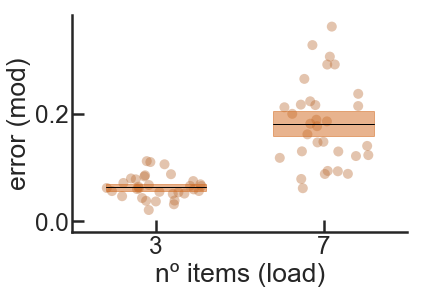

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\David\Anaconda3\envs\python3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\David\Anaconda3\envs\python3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\David\Anaconda3\envs\python3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


        Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: module  
No. Observations: 1525    Method:             REML    
No. Groups:       32      Scale:              0.0241  
Min. group size:  39      Likelihood:         608.7620
Max. group size:  48      Converged:          No      
Mean group size:  47.7                                
------------------------------------------------------
            Coef.  Std.Err.   z    P>|z| [0.025 0.975]
------------------------------------------------------
Intercept   -0.024    0.029 -0.811 0.417 -0.082  0.034
load         0.029    0.002 14.770 0.000  0.025  0.033
Group Var    0.024                                    



C:\Users\David\Anaconda3\envs\python3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\David\Anaconda3\envs\python3\lib\site-packages\statsmodels\regression\mixed_linear_model.py:2026: ConvergenceWarning: Gradient optimization failed.
  warnings.warn(msg, ConvergenceWarning)
C:\Users\David\Anaconda3\envs\python3\lib\site-packages\statsmodels\regression\mixed_linear_model.py:2066: ConvergenceWarning: The Hessian matrix at the estimated parameter values is not positive definite.
  warnings.warn(msg, ConvergenceWarning)
C:\Users\David\Anaconda3\envs\python3\lib\site-packages\statsmodels\base\model.py:1092: RuntimeWarning: invalid value encountered in sqrt
  bse_ = np.sqrt(np.diag(self.cov_params()))


In [7]:
linares_plot(x='load', y='module', df=df_, order=[3,7], 
              palette=['chocolate'], by_subj=True, subj_col='subj', reps=100,
            fill_box=True, point_size=10, alpha_box=0.5, sep_axis=False)

plt.ylabel('error (mod)')
plt.xlabel('nº items (load)')
plt.show()

# mod = smf.ols(formula='module ~ load', data=df_)
# res = mod.fit()
# print(res.summary())

md = smf.mixedlm('module ~ load', df_, groups=df_["subj"])
mdf = md.fit()
print(mdf.summary())

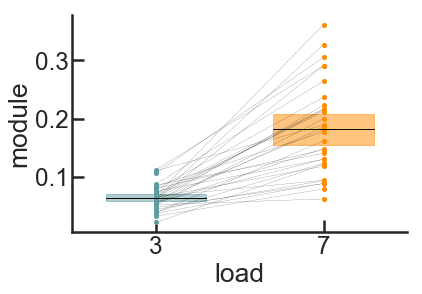

In [52]:

for i in df_.subj.unique():
     #######
    plt.plot([0,1], 
             [df_.loc[(df_['subj']==i) & (df_['load']==3), 'module' ].mean(), df_.loc[(df_['subj']==i) & (df_['load']==7), 'module' ].mean()],
              '--k', linewidth=0.2)
    plt.plot([0], [df_.loc[(df_['subj']==i) & (df_['load']==3), 'module' ].mean()], marker='o', color='cadetblue', markersize=4 )
    plt.plot([1], [df_.loc[(df_['subj']==i) & (df_['load']==7), 'module' ].mean()], marker='o', color='darkorange', markersize=4 )


linares_plot(x='load', y='module', df=df_, order=[3,7], 
              palette=['cadetblue', 'darkorange'], by_subj=True, subj_col='subj', reps=100,
            fill_box=True, point_size=0, alpha_box=0.5, sep_axis=False) 


    
    

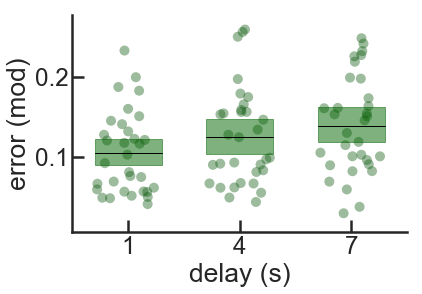

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\David\Anaconda3\envs\python3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\David\Anaconda3\envs\python3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\David\Anaconda3\envs\python3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


        Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: module  
No. Observations: 1525    Method:             REML    
No. Groups:       32      Scale:              0.0273  
Min. group size:  39      Likelihood:         512.2631
Max. group size:  48      Converged:          No      
Mean group size:  47.7                                
------------------------------------------------------
              Coef. Std.Err.   z   P>|z| [0.025 0.975]
------------------------------------------------------
Intercept     0.100    0.030 3.289 0.001  0.040  0.159
delay         0.006    0.002 3.366 0.001  0.002  0.009
Group Var     0.027                                   



C:\Users\David\Anaconda3\envs\python3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\David\Anaconda3\envs\python3\lib\site-packages\statsmodels\regression\mixed_linear_model.py:2026: ConvergenceWarning: Gradient optimization failed.
  warnings.warn(msg, ConvergenceWarning)
C:\Users\David\Anaconda3\envs\python3\lib\site-packages\statsmodels\regression\mixed_linear_model.py:2066: ConvergenceWarning: The Hessian matrix at the estimated parameter values is not positive definite.
  warnings.warn(msg, ConvergenceWarning)
C:\Users\David\Anaconda3\envs\python3\lib\site-packages\statsmodels\base\model.py:1092: RuntimeWarning: invalid value encountered in sqrt
  bse_ = np.sqrt(np.diag(self.cov_params()))


In [8]:
linares_plot(x='delay', y='module', df=df_, order=[1,4,7], 
              palette=['darkgreen'], by_subj=True, subj_col='subj', reps=100,
            fill_box=True, point_size=10, alpha_box=0.5, sep_axis=False)

plt.ylabel('error (mod)')
plt.xlabel('delay (s)')
plt.show()

# mod = smf.ols(formula='module ~ load', data=df_)
# res = mod.fit()
# print(res.summary())

md = smf.mixedlm('module ~ delay', df_, groups=df_["subj"])
mdf = md.fit()
print(mdf.summary())

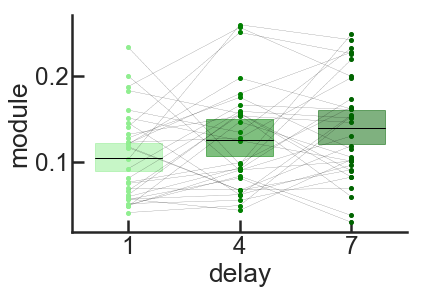

In [53]:
for i in df_.subj.unique():
     #######
    plt.plot([0,1,2], 
             [df_.loc[(df_['subj']==i) & (df_['delay']==1), 'module' ].mean(), 
              df_.loc[(df_['subj']==i) & (df_['delay']==4), 'module' ].mean(),
             df_.loc[(df_['subj']==i) & (df_['delay']==7), 'module' ].mean()],
              '--k', linewidth=0.2)
    plt.plot([0], [df_.loc[(df_['subj']==i) & (df_['delay']==1), 'module' ].mean()], marker='o', color='lightgreen', markersize=4 )
    plt.plot([1], [df_.loc[(df_['subj']==i) & (df_['delay']==4), 'module' ].mean()], marker='o', color='green', markersize=4 )
    plt.plot([2], [df_.loc[(df_['subj']==i) & (df_['delay']==7), 'module' ].mean()], marker='o', color='darkgreen', markersize=4 )


linares_plot(x='delay', y='module', df=df_, order=[1,4,7], 
              palette=['lightgreen', 'green', 'darkgreen' ], by_subj=True, subj_col='subj', reps=100,
            fill_box=True, point_size=0, alpha_box=0.5, sep_axis=False) 


    
    

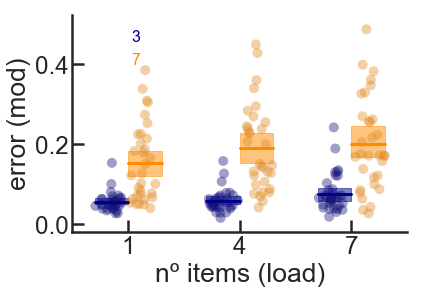

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\David\Anaconda3\envs\python3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\David\Anaconda3\envs\python3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\David\Anaconda3\envs\python3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


        Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: module  
No. Observations: 1525    Method:             REML    
No. Groups:       32      Scale:              0.0239  
Min. group size:  39      Likelihood:         604.5366
Max. group size:  48      Converged:          No      
Mean group size:  47.7                                
------------------------------------------------------
            Coef.  Std.Err.   z    P>|z| [0.025 0.975]
------------------------------------------------------
Intercept   -0.023    0.034 -0.684 0.494 -0.090  0.043
delay       -0.000    0.004 -0.032 0.975 -0.009  0.008
load         0.025    0.004  6.513 0.000  0.017  0.032
delay:load   0.001    0.001  1.469 0.142 -0.000  0.003
Group Var    0.024                                    



C:\Users\David\Anaconda3\envs\python3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\David\Anaconda3\envs\python3\lib\site-packages\statsmodels\regression\mixed_linear_model.py:2026: ConvergenceWarning: Gradient optimization failed.
  warnings.warn(msg, ConvergenceWarning)
C:\Users\David\Anaconda3\envs\python3\lib\site-packages\statsmodels\regression\mixed_linear_model.py:2066: ConvergenceWarning: The Hessian matrix at the estimated parameter values is not positive definite.
  warnings.warn(msg, ConvergenceWarning)
C:\Users\David\Anaconda3\envs\python3\lib\site-packages\statsmodels\base\model.py:1092: RuntimeWarning: invalid value encountered in sqrt
  bse_ = np.sqrt(np.diag(self.cov_params()))


In [68]:
linares_plot(x='delay', y='module', hue='load', df=df_, order=[1,4,7], 
             hue_order=[3,7], by_subj=True, subj_col='subj', reps=100,
             palette=['darkblue','darkorange'], 
            fill_box=True, point_size=10, alpha_box=0.5, sep_axis=False )

plt.ylabel('error (mod)')
plt.xlabel('nº items (load)')
plt.show()

md = smf.mixedlm('module ~ delay*load', df_, groups=df_["subj"])
mdf = md.fit()
print(mdf.summary())

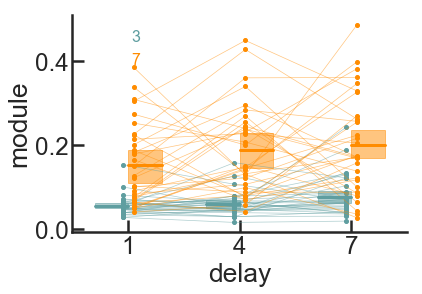

In [67]:
inc_=-0.05
inc=0.05

for i in df_.subj.unique():
     #######
    plt.plot([0+inc_,1+inc_,2+inc_], 
             [df_.loc[(df_['subj']==i) & (df_['delay']==1) & (df_['load']==3), 'module' ].mean(), 
              df_.loc[(df_['subj']==i) & (df_['delay']==4) & (df_['load']==3), 'module' ].mean(),
             df_.loc[(df_['subj']==i) & (df_['delay']==7) & (df_['load']==3), 'module' ].mean()],
              '-', color='cadetblue', linewidth=0.7, alpha=0.5)
    plt.plot([0+inc_], [df_.loc[(df_['subj']==i) & (df_['delay']==1)& (df_['load']==3), 'module' ].mean()], marker='o', color='cadetblue', markersize=4 )
    plt.plot([1+inc_], [df_.loc[(df_['subj']==i) & (df_['delay']==4)& (df_['load']==3), 'module' ].mean()], marker='o', color='cadetblue', markersize=4 )
    plt.plot([2+inc_], [df_.loc[(df_['subj']==i) & (df_['delay']==7)& (df_['load']==3), 'module' ].mean()], marker='o', color='cadetblue', markersize=4 )

    
    
for i in df_.subj.unique():
     #######
    plt.plot([0+inc,1+inc,2+inc], 
             [df_.loc[(df_['subj']==i) & (df_['delay']==1)& (df_['load']==7), 'module' ].mean(), 
              df_.loc[(df_['subj']==i) & (df_['delay']==4)& (df_['load']==7), 'module' ].mean(),
             df_.loc[(df_['subj']==i) & (df_['delay']==7)& (df_['load']==7), 'module' ].mean()],
              '-', color='darkorange', linewidth=0.7, alpha=0.5)
    plt.plot([0+inc], [df_.loc[(df_['subj']==i) & (df_['delay']==1)& (df_['load']==7), 'module' ].mean()], marker='o', color='darkorange', markersize=4 )
    plt.plot([1+inc], [df_.loc[(df_['subj']==i) & (df_['delay']==4)& (df_['load']==7), 'module' ].mean()], marker='o', color='darkorange', markersize=4 )
    plt.plot([2+inc], [df_.loc[(df_['subj']==i) & (df_['delay']==7)& (df_['load']==7), 'module' ].mean()], marker='o', color='darkorange', markersize=4 )


linares_plot(x='delay', y='module', hue='load', df=df_, order=[1,4,7], 
             hue_order=[3,7], by_subj=True, subj_col='subj', reps=100,
             palette=['cadetblue','darkorange'], 
            fill_box=True, point_size=0, alpha_box=0.5, sep_axis=False )
    



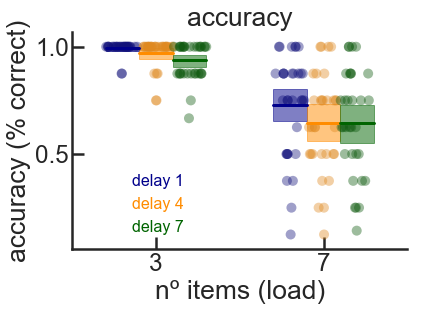

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\David\Anaconda3\envs\python3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\David\Anaconda3\envs\python3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\David\Anaconda3\envs\python3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


         Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: Correct  
No. Observations: 1525    Method:             REML     
No. Groups:       32      Scale:              0.1169   
Min. group size:  39      Likelihood:         -603.8529
Max. group size:  48      Converged:          No       
Mean group size:  47.7                                 
-------------------------------------------------------
             Coef.  Std.Err.   z    P>|z| [0.025 0.975]
-------------------------------------------------------
Intercept     1.210    0.075 16.060 0.000  1.063  1.358
delay        -0.006    0.010 -0.617 0.538 -0.025  0.013
load         -0.069    0.008 -8.196 0.000 -0.085 -0.052
delay:load   -0.001    0.002 -0.681 0.496 -0.005  0.002
Group Var     0.117                                    



C:\Users\David\Anaconda3\envs\python3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\David\Anaconda3\envs\python3\lib\site-packages\statsmodels\regression\mixed_linear_model.py:2026: ConvergenceWarning: Gradient optimization failed.
  warnings.warn(msg, ConvergenceWarning)
C:\Users\David\Anaconda3\envs\python3\lib\site-packages\statsmodels\regression\mixed_linear_model.py:2066: ConvergenceWarning: The Hessian matrix at the estimated parameter values is not positive definite.
  warnings.warn(msg, ConvergenceWarning)
C:\Users\David\Anaconda3\envs\python3\lib\site-packages\statsmodels\base\model.py:1092: RuntimeWarning: invalid value encountered in sqrt
  bse_ = np.sqrt(np.diag(self.cov_params()))


In [10]:
linares_plot(x='load', y='Correct', hue='delay_label', df=df_, order=[3,7], 
             hue_order=['delay 1', 'delay 4', 'delay 7'], by_subj=True, subj_col='subj', reps=100,
             palette=['darkblue', 'darkorange', 'darkgreen'], 
            fill_box=True, point_size=10, alpha_box=0.5, sep_axis=False)

plt.ylabel('accuracy (% correct)')
plt.xlabel('nº items (load)')
plt.title('accuracy')
plt.show()

# mod = smf.ols(formula='module ~ delay*load', data=df_)
# res = mod.fit()
# print(res.summary())

md = smf.mixedlm('Correct ~ delay*load', df_, groups=df_["subj"])
mdf = md.fit()
print(mdf.summary())

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


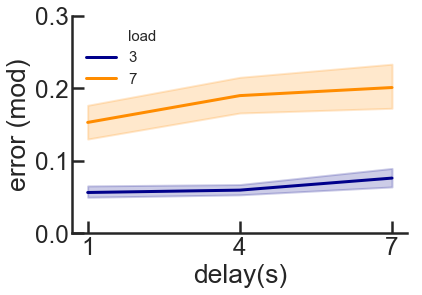

In [33]:
sns.lineplot(x='delay', y='module', hue='load', data=df_, hue_order=[3,7],
                 palette=['darkblue', 'darkorange'])

plt.ylabel('error (mod)')
plt.xlabel('delay(s)')
plt.legend(frameon=False, fontsize=15)
plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
plt.xticks([1,4,7])
plt.yticks([0,0.1,0.2,0.3])
plt.show()

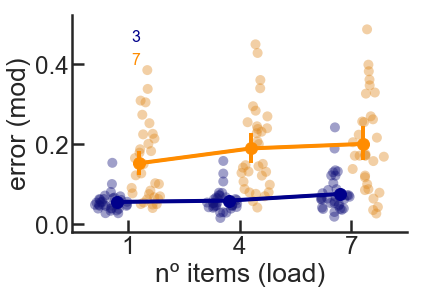

In [29]:
linares_plot(x='delay', y='module', hue='load', df=df_, order=[1,4,7], 
             hue_order=[3,7], by_subj=True, subj_col='subj', reps=100,
             palette=['darkblue','darkorange'], 
            fill_box=True, point_size=10, alpha_box=0.5, sep_axis=False , plot_box='line'        )

plt.ylabel('error (mod)')
plt.xlabel('nº items (load)')
plt.show()


In [ ]:
plt.figure(figsize=(20,    math.ceil(len(df_.subj.unique()) /6 )*3))
for s in df_.subj.unique():
    plt.subplot(math.ceil(len(df_.subj.unique()) /6 ),6,s+1)
    sns.lineplot(x='delay', y='module', data=df_.loc[df_['subj']==s], color='darkgreen')
    plt.ylabel('error', fontsize=20)
    plt.xlabel('delay(s)', fontsize=20)
    plt.xticks([1,4,7])
    plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
    plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
    plt.gca().get_xaxis().tick_bottom()                                                                                         
    plt.gca().get_yaxis().tick_left()
    plt.ylim(0, 0.6)

##
plt.tight_layout()

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


In [ ]:
plt.figure(figsize=(20,    math.ceil(len(df_.subj.unique()) /6 )*3))
for s in df_.subj.unique():
    plt.subplot(math.ceil(len(df_.subj.unique()) /6 ),6,s+1)
    sns.lineplot(x='load', y='module', data=df_.loc[df_['subj']==s], palette=['darkorange'])
    plt.ylabel('error', fontsize=20)
    plt.xlabel('nº items (load)', fontsize=20)
    plt.xticks([3,7])
    plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
    plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
    plt.gca().get_xaxis().tick_bottom()                                                                                         
    plt.gca().get_yaxis().tick_left()
    plt.ylim(0, 0.6)

##
plt.tight_layout()

In [ ]:
plt.figure(figsize=(20,    math.ceil(len(df_.subj.unique()) /6 )*3))
for s in df_.subj.unique():
    plt.subplot(math.ceil(len(df_.subj.unique()) /6 ),6,s+1)
    sns.lineplot(x='delay', y='module', hue='load', data=df_.loc[df_['subj']==s], hue_order=[3,7],
                 palette=['cadetblue', 'darkorange'],legend=False)
    plt.ylabel('error', fontsize=20)
    plt.xlabel('nº items (load)', fontsize=20)
    plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
    plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
    plt.gca().get_xaxis().tick_bottom()                                                                                         
    plt.gca().get_yaxis().tick_left()
    plt.xticks([1,4,7])
    plt.ylim(0, 0.6)
    
##
plt.tight_layout()